In [91]:
#  Install the Python Requests library:
# `pip install requests`
import requests

def send_request():
    response = requests.get(
        url='https://app.scrapingbee.com/api/v1/',
        params={
            'api_key': 'Your Key',
            'url': 'https://www.amazon.com/LeisureMod-Modern-Dining-Chair-Cushion/dp/B071WMRZCY?ref_=ast_sto_dp&th=1', 
            'wait':'20000'
        },
        
    )
    print('Response HTTP Status Code: ', response.status_code)
    #print('Response HTTP Response Body: ', response.text)
    data = response.text
    print(type(data))
    Resp = Selector(text=response.text )
    Func = open("response_data_for_images47.html","w")
  
        # Adding input data to the HTML file
    #Response = Selector(text= res)
    Func.write(response.text)

    # Saving the data into the HTML file
    Func.close()
    variant_imgs = Resp.css('div[id="tp-inline-twister-dim-values-container"] img::attr(src)').extract()
    prices =  Resp.css('div[id="inline-twister-expander-content-color_name"]').extract()
    print(prices)
    
send_request()

Response HTTP Status Code:  200
<class 'str'>
['<div id="inline-twister-expander-content-color_name" data-totalvariationcount="7" aria-label="There are 7 options." class="a-section a-spacing-none dimension-expander-content dimension-expander-content-expand">    <div class="a-section"> <div id="tp-inline-twister-dim-values-container" class="a-section a-spacing-none"> <ul class="a-unordered-list a-nostyle a-button-list a-declarative a-button-toggle-group a-horizontal dimension-values-list" role="" data-csa-c-func-deps="aui-da-a-button-group" data-csa-c-type="widget" data-csa-interaction-events="click" data-action="a-button-group" data-a-button-group=\'{"name":"color_name"}\' data-csa-c-id="gyybrk-mpwcn8-kgmhjg-wkowyj">            <li class="swatch-prototype dimension-value-list-item-square-image inline-twister-swatch reduced-image-swatch-margin"><span class="a-list-item">   <span id="color_name" class="a-button a-button-toggle image-swatch-button"><span class="a-button-inner"><input name

In [57]:
# import math
# import hashlib
import re
import json
import datetime
from datetime import timedelta
# from urllib.parse import urlparse
#import dateparser
#from dateparser import search as datesearch
import scrapy
# from scrapy.conf import settings
from scrapy.selector import Selector

import requests
from bs4 import BeautifulSoup

import traceback2 as traceback


class AmazonproductSpider:


    def start(self):
        
        product_url = 'https://app.scrapingbee.com/api/v1/'
        response = requests.get(
        url=product_url,
        params={
            'api_key': 'Your key,
            'url': 'https://www.amazon.com/Furniture-176017-BK-Premium-LK06-2-Fabric/dp/B073ZKNRPS/ref=sr_1_1?keywords=J%26M+Furniture&qid=1674980081&sr=8-1',  
        },
        
    )
        print('Response HTTP Status Code: ', response.status_code)
        #print('Response HTTP Response Body: ', response.content)
        self.dump_into_html(response)
        self.parse_response(response,product_url)
        
        print('in the start_requests')
        
    def dump_into_html(self,response):
        Func = open("response_data_for_images1.html","w")
  
        # Adding input data to the HTML file
        #Response = Selector(text= res)
        Func.write(response.text)

        # Saving the data into the HTML file
        Func.close()
        
    def parse_response(self, Response,product_url):
        print('in the parse_response')
        #media_entity = response.meta['media_entity']
        #product_url = media_entity["url"]
        res = Response.text
        response = Selector(text= Response.text)
        

        try:
            images_dict = {}
            images_all = response.css('div[id="altImages"] img::attr(src)').extract()
            images_dict['Images'] = images_all
        except:
            images_all = '_'







        try:
            discount = '-'
            if 'id="corePriceDisplay_desktop_feature_div"'  in str(res) or 'class="a-section a-spacing-none aok-align-center"' in str(res):
                discount = response.css('div[class="a-section a-spacing-none aok-align-center"]').css(".savingsPercentage::text").extract_first()

            elif 'class="a-lineitem a-align-top"' in res:
                discount_ = response.css('#corePrice_desktop .a-color-price span::text').extract()
                for i in discount_:
                    val = i.strip()
                    if '%' in val:
                        discount = val[1:-1]

            if discount != '-' and discount is not None:
                discount=discount.replace('-','')
            if discount == None:
                discount = '-'
        except:
            discount = '-'


        try:
            if 'id="corePriceDisplay_desktop_feature_div"' in res or 'class="a-section a-spacing-none aok-align-center"' in res:
                actual_price = response.css(
                    'span[class="a-size-small a-color-secondary aok-align-center basisPrice"]').css(
                    'span[class="a-offscreen"]::text').extract_first()
            elif 'class="a-lineitem a-align-top"' in res:
                if 'class="a-price-range"' in res:
                    actual_price = response.css(
                        'span[class="a-price a-text-price a-size-medium apexPriceToPay"]').css(
                        'span[class="a-offscreen"]::text').extract()
                    actual_price = '-'.join(actual_price)
                elif 'class="a-price a-text-price a-size-base"' in res:
                    actual_price = response.css(
                        'span[class="a-price a-text-price a-size-base"] ::text').extract_first()
                else:
                    #actual_price = self.get_price_from_response(response)
                    print("in else for self.get_price_from_response(res) method")

            elif len(response.css("#price").extract()) == 0:
                actual_price = self.get_price_from_response(res)

            else:
                actual_price=response.css("#price").extract()
                #actual_price = '-'
        except Exception as e:
            print("Exception at 104: ", traceback.print_exc())
            #self.dump(response, 'html', 'amazon_prod', self.source, product_id)
            actual_price = '-'
        # discounted_price
        discounted_price='-'
        try:
            if 'id="tmmSwatches"' in res:
                discounted_price_ = response.css(
                    'span[class="a-button a-button-selected a-spacing-mini a-button-toggle format"] span::text').extract()
                price = []
                for i in discounted_price_:
                    i = i.strip()
                    if len(i) > 0:
                        price.append(i)
                discounted_price = price[1]

            elif 'id="corePriceDisplay_desktop_feature_div"' in res or 'class="a-section a-spacing-none aok-align-center"' in res:
                discounted_price = response.css('div[class="a-section a-spacing-none aok-align-center"]').css(
                    'span[class="a-offscreen"]::text').extract_first()

            elif 'class="a-lineitem a-align-top"' in res:
                discounted_price = response.css(
                    'span[class="a-price a-text-price a-size-medium apexPriceToPay"]').css(
                    'span[class="a-offscreen"]::text').extract_first()

            elif 'class="cardRoot bucket"' in res:
                price = response.css('div[class="cardRoot bucket"]::attr(data-components)').extract_first().strip()
                price = json.loads(price)
                discounted_price = price['1']['price']['displayString']

        except:
            #self.dump(response, 'html', 'amazon_prod', self.source, product_id)
            discounted_price = '-'

        # if discounted_price == '':
        #     discounted_price = '-'
        # if actual_price == '' or actual_price == None:
        #     actual_price = discounted_price
        
        if (discounted_price == '' or discounted_price == '-') and discount == "-":
            discounted_price = actual_price#'-' #actual_price #
        if actual_price == '' or actual_price == None or actual_price == "-":
            actual_price = discounted_price
        if discounted_price == '':
            discounted_price = "-"

        print("final discounted_price and actual_price at 150 line are: ", discounted_price, actual_price)


        try:
            about = '-'
            description_list = response.css("#feature-bullets .a-list-item::text").extract()
            description = []
            for line in description_list:
                sent = line.strip()
                description.append(sent)

            about = '\n'.join(description)

            if about == '-':
                if 'id="bookDescription_feature_div"' in res:
                    about = response.css('div[id="bookDescription_feature_div"] span ::text').extract()
                    about = ' '.join(about)
        except:
            #self.dump(response, 'html', 'amazon_prod', self.source, product_id)
            about = '-'
        # average_rating
        try:
            if 'id="acrCustomerReviewText"' in res:
                average_rating = response.css(".a-size-medium.a-color-base::text").extract()
                average_rating = average_rating[-1].split()[0].replace(',','.').replace('星5つ中の','')
                #average_rating = average_rating[:average_rating.index('o')].strip()
            else:
                average_rating = 0

        except:
            #self.dump(response, 'html', 'amazon_prod', self.source, product_id)
            average_rating = 0

        __title = ['div.product-title a.a-link-normal', 'span#productTitle', 'div#mas-title span.a-size-large',
                   'h1.a-size-large a-spacing-micro', 'span#ebooksProductTitle', '#productTitle']
        #__brand = ['div.product-by-line a.a-link-normal', 'a#bylineInfo', 'a#brand', 'a#ProductInfoArtistLink',
        #           'a.a-link-normal contributorNameID', 'a.a-link-normal',
        #           'span.a-size-mini a-text-bold a-text-italic']

        title, brand = '-', '-'

        try:
            for i in range(0, len(__title)):
                _title = response.css('{}::text'.format(__title[i])).extract_first()
                if _title:
                    title = _title.strip()
                    # break
        except:
            #self.dump(response, 'html', 'amazon_prod', self.source, product_id)
            title = '-'



        try:
            rating_count = response.css("#acrCustomerReviewText::text").extract_first()
            if rating_count is not None:
                if '個の評価' in rating_count:
                    rating_count=rating_count.replace('個の評価','')
                else:
                    rating_count=','.join(rating_count.split()[:-1]).replace('.',',').replace(' ','')
                    if ',avaliações,de' in rating_count:
                        rating_count=rating_count.replace(',avaliações,de','')
                #rating_count = rating_count[:rating_count.index('r')]
        except:
            #self.dump(response, 'html', 'amazon_prod', self.source, product_id)
            rating_count = 0
        try:
            asin = '-'
            if '/dp/' in product_url:
                index_value = product_url.index('dp/')
                asin = product_url[index_value + 3:index_value + 2 + 11]
            elif '/gp/' in product_url:
                index_value=product_url.index('gp/')
                asin = product_url[index_value + 11:index_value + 10 + 11]
        except:
            #self.dump(response, 'html', 'amazon_prod', self.source, product_id)
            asin = '-'

        seller= '-'
        if 'id="merchant-info"' in res:
            print("merchant_info is there")
            try:
                #seller = '-'
                seller = response.css('#merchant-info span::text').extract()
                for ele in seller:
                    if '\n' in ele:
                        seller.remove(ele)
                # if seller[0]!='\n        ' and ("Sold by" not in seller[0]) and ("Verkauf" not in seller[0]):
                #     seller=seller[0].strip()
                # else:
                #     seller = seller[1].strip()
                seller=''.join(seller)
            except:
                #self.dump(response, 'html', 'amazon_prod', self.source, product_id)
                seller = '-'

            if seller == '' or seller == None or seller == '-':
                try:
                    seller = '-'
                    seller_lis = []
                    if 'id="merchant-info"' in res:
                        seller_ = response.css('#merchant-info::text').extract()
                        for i in seller_:
                            i = i.strip()
                            if len(i) > 0:
                                seller_lis.append(i)
                        seller = ' '.join(seller_lis)
                except:
                    #self.dump(response, 'html', 'amazon_prod', self.source, product_id)
                    seller = '-'

        elif 'class="print-sold-by"' in res:
            seller = response.css('tr[class="print-sold-by"] span::text').extract_first()

        elif 'amazon.com' in res and 'class="tabular-buybox-container"' in res:
            seller_list=['Sold by','Vendu par','Vendido por','販売元','Venditore']
            try:
                for item in seller_list:
                    if item in res:
                        seller_ = response.css('div[tabular-attribute-name="'+item+'"] ::text').extract()
                        seller_lis = []
                        for i in seller_:
                            i = i.strip()
                            if len(i) > 0:
                                seller_lis.append(i)
                        seller = ' '.join(seller_lis)
                        break
            except:
                #self.dump(response, 'html', 'amazon_prod', self.source, product_id)
                seller = '-'

        else:
            #self.dump(response, 'html', 'amazon_prod', self.source, product_id)
            seller = '-'

        #if (('Sold by and Delivered by Amazon' in seller) or ('Ships from and sold by Amazon' in seller) or ('Verkauf und Versand durch Amazon' in seller) or ('Dispatched from and sold by' in seller)):
        #    seller = seller.split()[-1]
        if seller == '':
            seller='-'

        try:
            life_time = self.get_lifetime_ratings(product_id, Response)
            rating_map = life_time['rating_map']
        except:
            #self.dump(response, 'html', 'amazon_prod', self.source, product_id)
            rating_map = '-'

        if 'productDetails_detailBullets' in res:
            raw_data = response.css("#productDetails_detailBullets_sections1 tr~ tr+ tr span::text").extract()
            best_ = response.css("#productDetails_detailBullets_sections1 tr~ tr+ tr a::text").extract()
            if raw_data==[] and best_==[]:
                raw_data = response.css("#productDetails_detailBullets_sections1 tr~ tr span::text").extract()
                best_ = response.css("#productDetails_detailBullets_sections1 tr~ tr a::text").extract()
            best_seller1 = []
            best_seller2 = []
            best_seller = ''
            try:
                for sent in raw_data:
                    sent = sent.strip()
                    if len(sent) != 0 and ('#' in sent):
                        best_seller1.append(sent)
                for item in best_:
                    item=item.strip()
                    if len(sent)!=0:
                        best_seller2.append(item)
                for i in range(len(best_)):
                    best_seller += best_seller1[i + 1] + " " + best_seller2[i] + " "
                best_seller = best_seller1[0] + best_seller
                best_seller= best_seller.replace(':','')
            except:
                best_seller1 = []
                best_seller2 = []
                best_seller=''
                try:
                    for sent in raw_data:
                        sent = sent.strip()
                        if len(sent) != 0 and (('avaliações de clientes' not in sent) and ('estrelas' not in sent) and ('étoiles' not in sent) and ('évaluations' not in sent) and ('yıldız' not in sent) and ('üzerinden' not in sent) and ('ratings' not in sent) and ('stars' not in sent)):
                            best_seller1.append(sent)
                    best_seller2 = best_
                    best_seller=best_seller1[0]+best_seller2[0]+' '.join(best_seller1[1:])+' '+best_seller2[-1]
                    best_seller=best_seller.replace(':','')
                except:
                    #self.dump(response, 'html', 'amazon_prod', self.source, product_id)
                    best_seller = ''


        elif 'detail-bullet-list' in res:
            try:
                best_seller_list = []
                res = response.css("#detailBullets_feature_div+ .detail-bullet-list .a-list-item ::text").extract()
                for i in res:
                    sent = i.strip()
                    if len(sent) > 0:
                        best_seller_list.append(sent)
                best_seller = ' '.join(best_seller_list)
                seller_rank_list=["Best Sellers Rank:","Classement des meilleures ventes d'Amazon :","Clasificación en los más vendidos de Amazon","Amazon Bestseller-Rang: "]
                for item in seller_rank_list:
                    if item in best_seller:
                        best_seller = best_seller.replace(item,'')
                best_seller = best_seller.replace(':','')
            except:
                #self.dump(response, 'html', 'amazon_prod', self.source, product_id)
                best_seller = '-'
        else:
           # self.dump(response, 'html', 'amazon_prod', self.source, product_id)
            best_seller = '-'

        stock_title = ['span[class="a-size-medium a-color-success"]', 'div[id="availability"] span']
        try:
            stock = '-'
            for _title in stock_title:
                _stock = response.css('{}::text'.format(_title)).extract_first()
                if _stock:
                    stock = _stock.strip()
                    break
            if stock == None or stock == '' or stock.isspace():
                stock = '-'
        except:
           # self.dump(response, 'html', 'amazon_prod', self.source, product_id)
            stock = '-'
        print(stock)
        if 'dispatched' in stock:
            stock = 'In stock'
        elif 'In stock' in stock:
            stock = 'In stock'
        elif '.' in stock:
            stock=stock.replace('.','')
        print(stock)
        product_info = self.product_details(Response)
        if product_info == {}:
            product_info='-'
        if len(best_seller)==0:
            try:
                seller_rank_list=["Best Sellers Rank","Classement des meilleures ventes d'Amazon","Clasificación en los más vendidos de Amazon",'Amazon Bestseller-Rang']
                for item in seller_rank_list:
                    if item in product_info['product_info'].keys():
                        best_seller = product_info['product_info'][item]
                        break

            except:
                #self.dump(response, 'html', 'amazon_prod', self.source, product_id)
                best_seller = '-'
        # try:
        #     if brand == '-':
        #         brand_list=["Brand","Marca"]
        #         for item in brand_list:
        #             if item in product_info['product_info'].keys():
        #                 brand=product_info['product_info'][item]
        #                 break
        # except:
        #     self.dump(response, 'html', 'amazon_prod', self.source, product_id)
        #     brand='-'
        try:
            if average_rating == 0:
                average_rating = life_time['avg_rating']
            average_rating = average_rating.replace('星，共','')
        except:
            #self.dump(response, 'html', 'amazon_prod', self.source, product_id)
            average_rating = '-'
        try:
            if '/dp/' in product_url:
                index_value = product_url.index('dp/')
                asin = product_url[index_value + 3:index_value + 2 + 11]
            elif '/gp/' in product_url:
                index_value=product_url.index('gp/')
                asin=product_url[index_value+11:index_value+10+11]
        except:
            asin = '-'
        if len(asin) == 0:
            try:
                asin = product_info['product_info']['ASIN']
            except:
                #self.dump(response, 'html', 'amazon_prod', self.source, product_id)
                asin = '-'
        try:
            #brand=''
            if 'id="centerCol"' in res:
                brand = response.css('a[id="brand"]::text').extract_first()
                if brand is None:
                    brand=response.css('a[id="bylineInfo"] ::text').extract_first()
                    if ':' in brand:
                        brand=' '.join(brand.split(':')[1:])
            elif 'id="titleBlockLeftSection"' in res:
                brand = response.css('a[id="bylineInfo"] ::text').extract_first()
                brand=' '.join(brand.split()[1:])

            elif brand=='-':
                if 'class="a-spacing-none a-spacing-top-small po-brand"' in res:
                    brand=response.css('tr[class="a-spacing-none a-spacing-top-small po-brand"] span::text').extract()
                    brand=brand[1]
                elif 'class="a-spacing-small po-brand"' in res:
                    brand = response.css('tr[class="a-spacing-small po-brand"] span::text').extract()
                    brand = brand[1]
        # try:
            if brand == '-':
                brand_list=["Brand","Marca"]
                for item in brand_list:
                    if item in product_info['product_info'].keys():
                        brand=product_info['product_info'][item]
                        break
        # except:
        #     self.dump(response, 'html', 'amazon_prod', self.source, product_id)
        #     brand='-'

            if brand=='None' or brand==None:
                    brand=''
        except:
            #self.dump(response, 'html', 'amazon_prod', self.source, product_id)
            brand = '-'
        try:
            if brand == '-':
                brand_res=response.css('table[class="a-keyvalue a-spacing-mini"]').extract_first()
                soup = BeautifulSoup(brand_res, 'html.parser')
                table_row = soup.findAll('tr')[5]
                brand=table_row.find('td').text


        except:
           # self.dump(response, 'html', 'amazon_prod', self.source, product_id)
            brand = '-'

        try:
            if 'class="a-unordered-list a-horizontal a-size-small"' in res:
                category_url_ = response.css(
                    'ul[class="a-unordered-list a-horizontal a-size-small"] a::attr(href)').extract()
                category_url = 'https://www.amazon.in' + category_url_[-1]
            else:
                category_url = '-'
        except:
            #self.dump(response, 'html', 'amazon_prod', self.source, product_id)
            category_url = '-'
        image_url='-'
        try:
            if 'id="main-image-container"' in res:
                image_url=response.css('div[id="imgTagWrapperId"]').css('img::attr(src)').extract()
            elif 'id="ebooksImageBlockContainer"' in res:
                image_url=response.css('div[id="ebooks-img-canvas"]').css('img::attr(src)').extract()
            if len(image_url)==1:
                image_url = '=IMAGE("'+image_url[0]+'")'
            elif len(image_url)==2:
                image_url='=IMAGE("'+image_url[1]+'")'
                pass
        except:
            #self.dump(response, 'html', 'amazon_prod', self.source, product_id)
            image_url = '-'
        self.yield_product_details(
            product_url=product_url,
            about=about,
            product_price=actual_price,
            discount_price=discounted_price,
            discount=discount,
            rating_count=rating_count,
            avg_rating=average_rating,
            seller_name=seller,
            product_information=product_info,
            product_name=title,
            brand_name=brand,
            asin=asin,
            stock=stock,
            best_seller_rating=best_seller,
            rating_map=rating_map,
            category_url=category_url,
            image_url=images_dict
            )

    def get_lifetime_ratings(self, product_id, response):
        try:
            response = Selector(text = response.text)
            ratings = response.css('td.a-span10 div::attr(aria-valuenow)').extract()[::-1]
            _review_count = response.css(
                'span[id="acrCustomerReviewText"]::text').extract_first().replace(',', '').replace('.', '')
            review_count = re.findall(r'\d+', _review_count)
            review_count=''.join(review_count)

            _average_ratings = response.css(
                'span.a-declarative span.a-icon-alt::text').extract_first().replace(',', '.')
            average_ratings = re.findall(r'\d+\.\d+', _average_ratings)[0]
            if len(average_ratings)==0:
                average_ratings=_average_ratings[0]


            rating_map = {}

            if review_count == 0:
                rating_map = '-'
            else:
                for i in range(1, 6):
                    rating_map['rating_' + str(i)] = round(
                        int(ratings[int(i) - 1].replace('%', '')) * int(review_count) / 100)

        except Exception as exp:
            #self.logger.error(f"Unable to fetch the lifetime ratings, {exp}")
            return '-'

        return {'avg_rating': average_ratings, 'rating_map': rating_map, 'review_count': review_count}

    def product_details(self, Res):
        product_info = {}
        res = Res.text
        response = Selector(text= Res.text)
        #media_entity = response.meta['media_entity']
        #product_id = media_entity["id"]
        #self.dump(response, 'html', 'amazon_prod_detials', self.source, product_id)
        try:
            if 'id="prodDetails"' in res or 'id="detailBulletsWrapper_feature_div"' in res:
                if 'id="prodDetails"' in res:
                    prod_info_val_list = {}
                    for item in response.css('div[id="prodDetails"] tr'):
                        _prod_key = item.css('th').extract_first()
                        prod_key = ' '.join(
                            BeautifulSoup(_prod_key, "html.parser").stripped_strings)
                        if '\u200e' in prod_key:
                            prod_key = prod_key.split('\u200e')[1]
                        _prod_value = item.css('td').extract_first()
                        if _prod_value is None:
                            prod_value="None"
                        else:
                            prod_value = ' '.join(
                                BeautifulSoup(_prod_value, "html.parser").stripped_strings)
                        if '\u200e' in prod_value:
                            prod_value = prod_value.split('\u200e')[1]
                        prod_info_val_list.update({prod_key: prod_value})
                    #reviews_list=['Customer Reviews','Media recensioni','Commentaires client','Moyenne des commentaires client','Durchschnittliche Kundenbewertung','Müşteri Yorumları','Valoración media de los clientes','おすすめ度','Avaliações de clientes','Opinión media de los clientes','用户评分']
                    for country_review in prod_info_val_list.keys():
                        if 'text-decoration: none;' in prod_info_val_list[country_review]:
                            extracted_reviews=str(prod_info_val_list[country_review]).split('text-decoration: none; \n    }')[1].split('P.when')[0].replace(',','.').replace('\xa0',' ')
                            prod_info_val_list[country_review]=extracted_reviews
                            break
                    product_info.update({"product_info": prod_info_val_list})

                else:
                    prod_info_val_list = []
                    count=0
                    for item in response.css(
                            'div[id="detailBulletsWrapper_feature_div"] span[class="a-list-item"]'):
                        _prod_val = item.css('span[class="a-list-item"]').extract_first()
                        _prod_val = str(_prod_val)
                        if count>0:
                            count=count-1
                            continue
                        if 'class="a-unordered-list a-nostyle a-vertical zg_hrsr"' in _prod_val :
                            count=_prod_val.count('class="a-list-item"')
                            count=count-1
                        _prod_val = ' '.join(
                            BeautifulSoup(_prod_val, "html.parser").stripped_strings)
                        _prod_val = _prod_val.replace(
                            '\n                                    \u200e', '') \
                            .replace('\n                                    \u200f', '') \
                            .replace('\n                                    \u200f', '') \
                            .replace('\n                                        ', '')
                        soup = BeautifulSoup(_prod_val, 'html.parser')
                        for s in soup(['script', 'style']):
                            s.decompose()
                        prod_val = ' '.join(soup.stripped_strings)
                        if 'text-decoration: none;' in prod_val:
                            prod_val = 'Customer Reviews:' + prod_val.split(
                                'text-decoration: none; \n    }')[1].split('P.when')[0].replace(',','.').replace('\xa0',' ')
                        prod_info_val_list.append(prod_val)
                    product_info.update({"product_info": prod_info_val_list})
            elif 'id="audibleproductdetails_feature_div"' in res:
                prod_info_val_list = {}
                for item in response.css('div[id="audibleProductDetails"] tr'):
                    _prod_key = item.css('th').extract_first()
                    prod_key = ' '.join(BeautifulSoup(_prod_key, "html.parser").stripped_strings)
                    if '\u200e' in prod_key:
                        prod_key = prod_key.split('\u200e')[1]

                    _prod_value = item.css('td').extract_first()
                    prod_value = ' '.join(
                        BeautifulSoup(_prod_value, "html.parser").stripped_strings)
                    if '\u200e' in prod_value:
                        prod_value = prod_value.split('\u200e')[1]
                    prod_info_val_list.update({prod_key: prod_value})
                product_info.update({"product_info": prod_info_val_list})
            else:
                return product_info
        except :
            return "-"
        if product_info == '{}':
            return "-"
        return product_info

    def get_price_from_response(self, res):
        print("in the get_price_from_response")
        print(res)
        res_2 = "<!doctype html>"+str(res).split("<!doctype html>")[1]
        res_final = res_2.split("</html>")[0]+"</html>"
        soup = BeautifulSoup(res_final, "html.parser")
        class_soup = soup.select_one('ul[class*="a-unordered-list a-nostyle a-button-list a-declarative a-button-toggle-group a-horizontal a-spacing-top-micro swatches swatchesSquare"]')
        li_soup = class_soup.select_one('li[class*="swatchSelect"]')
        actual_price_string = li_soup.select_one('span[class*="a-size-mini olpWrapper"]').get_text(strip=True)
        actual_price = actual_price_string.split(" ")[-1]
        return actual_price

    def yield_product_details(self,product_url,product_name, brand_name,product_price,avg_rating,
                        seller_name,category_url='',
                        volume_or_weight='',additional_fields='',seller_url='', seller_avg_rating='',about='',
                        seller_no_of_ratings='',no_of_unites_sold='',total_reviews='',
                        seller_followers='', seller_no_of_unites_sold='',discount_price='', discount='',rating_count='',
                        best_seller_rating='',rating_map='',asin='', stock='',product_description='', product_information='',
                            product_specifications= " ", breadcrumb = " ",image_url = " ", highlights=" "):
        print("inside yield_product_details method")

        media = {
            "Product URL": product_url,
            "Product Name": product_name,
            "Brand Name": brand_name,
            "List Price": product_price,
            "About this Item": about,
            "Rating": avg_rating,
            "Review Count": total_reviews,
            "Product Description": product_description,
            "Product Information": product_information,
            "Seller Name": seller_name,
            "Category URL": category_url,
            "Additional Fields": additional_fields,
            "Seller URL": seller_url,
            "Seller Rating": seller_avg_rating,
            "Seller Rating Count": seller_no_of_ratings,
            "Discounted Price": discount_price,
            "Discount Percentage": discount,
            "Rating Count": rating_count,
            "Best Sellers Rank": best_seller_rating,
            "Rating Breakdown": rating_map,
            "ASIN": asin,
            "Product Availability": stock,
            "Product Specifications": product_specifications,
            "Image":image_url,
            "Highlights": highlights
        }

        print(media)


Response HTTP Status Code:  200
in the parse_response
in the get_price_from_response
<!DOCTYPE html><html lang="en-us" class="a-ws a-js a-audio a-video a-canvas a-svg a-drag-drop a-geolocation a-history a-webworker a-autofocus a-input-placeholder a-textarea-placeholder a-local-storage a-gradients a-transform3d -scrolling a-text-shadow a-text-stroke a-box-shadow a-border-radius a-border-image a-opacity a-transform a-transition null" data-19ax5a9jf="dingo" data-aui-build-date="3.22.2-2023-01-26"><!-- sp:feature:head-start --><head><script async="" src="https://c.amazon-adsystem.com/bao-csm/forensics/a9-tq-forensics-incremental.min.js" crossorigin="anonymous"></script><script async="" src="https://images-na.ssl-images-amazon.com/images/I/31QYhx-taiL.js" crossorigin="anonymous"></script><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8">
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->

<script type="text/javascript">var ue_t0=ue_t0||+n
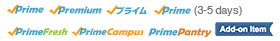

Traceback (most recent call last):
  File "/var/folders/ps/7qc67t1s2dn1q7qd11s2s72c0000gn/T/ipykernel_30238/104640899.py", line 111, in parse_response
  File "/var/folders/ps/7qc67t1s2dn1q7qd11s2s72c0000gn/T/ipykernel_30238/104640899.py", line 648, in get_price_from_response
IndexError: list index out of range


In [58]:
obj = AmazonproductSpider()
obj.start()

In [2]:
pip install traceback2

Note: you may need to restart the kernel to use updated packages.
